In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../data/Video-Games-Sales-Editado.csv')
df_nintendo=df[df['Publisher'] =='Nintendo']

# Algunos gráficos del publisher Nintendo

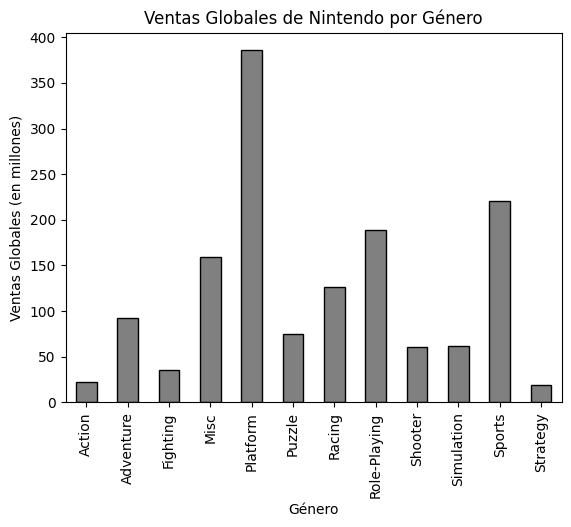

In [2]:
suma_por_genero = df_nintendo.groupby('Genre')['Global'].sum()
suma_por_genero.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Ventas Globales de Nintendo por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

El género predominante es Plataforma, con su insigne saga de Mario.

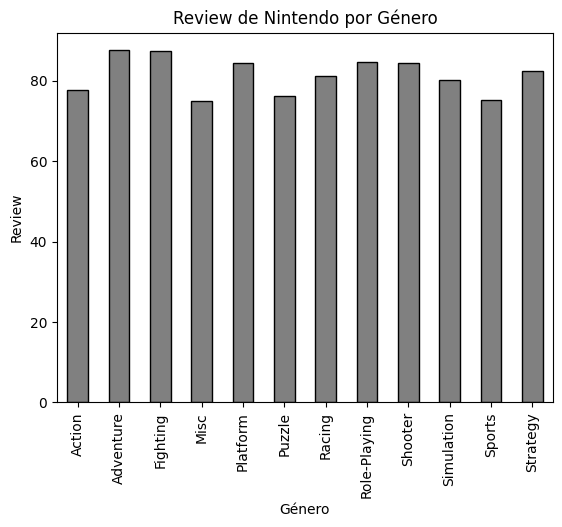

In [37]:
promedio_reviev_por_genero = df_nintendo.groupby('Genre')['Review'].mean()
promedio_reviev_por_genero.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Review de Nintendo por Género')
plt.xlabel('Género')
plt.ylabel('Review')
plt.show()

La mayoria de los generos tienen un buen Review.

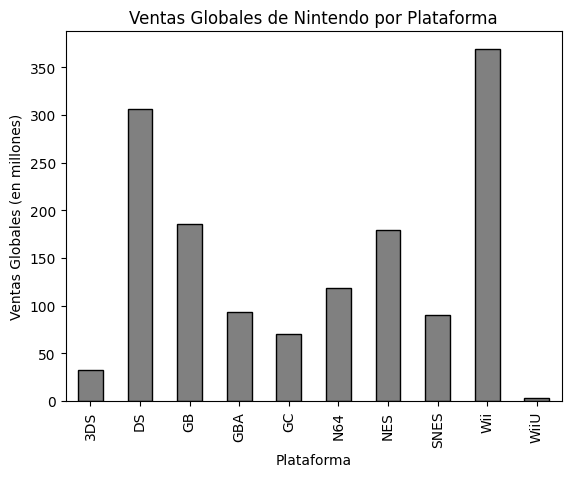

In [23]:
suma_por_plataforma = df_nintendo.groupby('Platform')['Global'].sum()
suma_por_plataforma.plot(kind='bar', color='grey', edgecolor='black')
plt.title('Ventas Globales de Nintendo por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.show()

Predominancia de venta de las consolas Wii y Ds, sobremesa y portatil respectivamente.

## Gráficos de Ventas Globales a lo largo de los años.

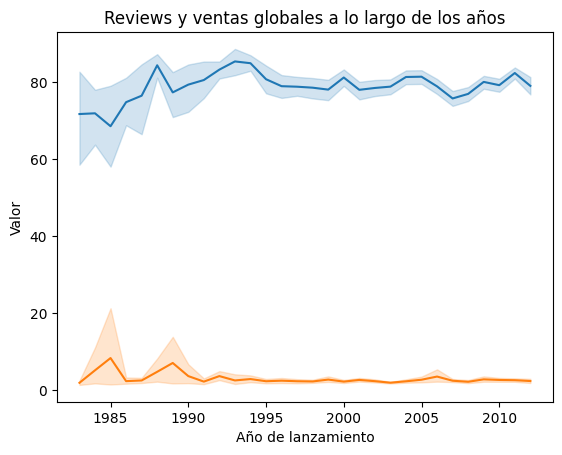

In [46]:
import seaborn as sns


sns.lineplot(x="Year", y='Review', data=df)
sns.lineplot(x="Year", y='Global', data=df )

plt.xlabel('Año de lanzamiento')
plt.ylabel('Valor')
plt.title('Reviews y ventas globales a lo largo de los años')
plt.show()

Se observa un equilibrio en las ventas de cada año rondando en los 75 millones.

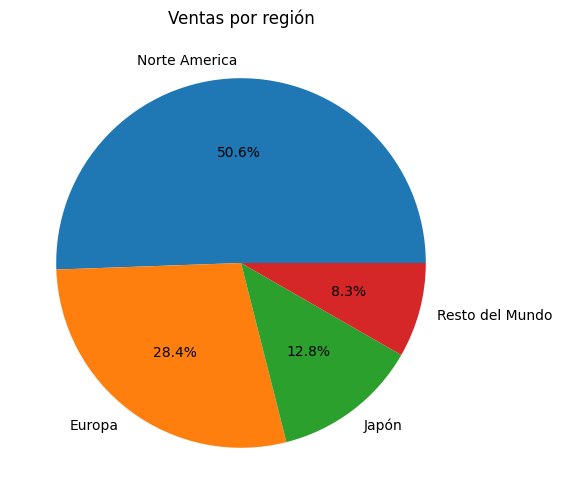

In [57]:
regiones=["North America","Europe","Japan","Rest of World"]
ventas_totales = df[regiones].sum()

plt.figure(figsize=(6, 6))
plt.pie(ventas_totales, labels=['Norte America','Europa','Japón','Resto del Mundo'], autopct='%1.1f%%')
plt.title('Ventas por región')
plt.show()

El mercado de Norte America es el mas influyente dentro de los demás.

## Plataformas vs Género.

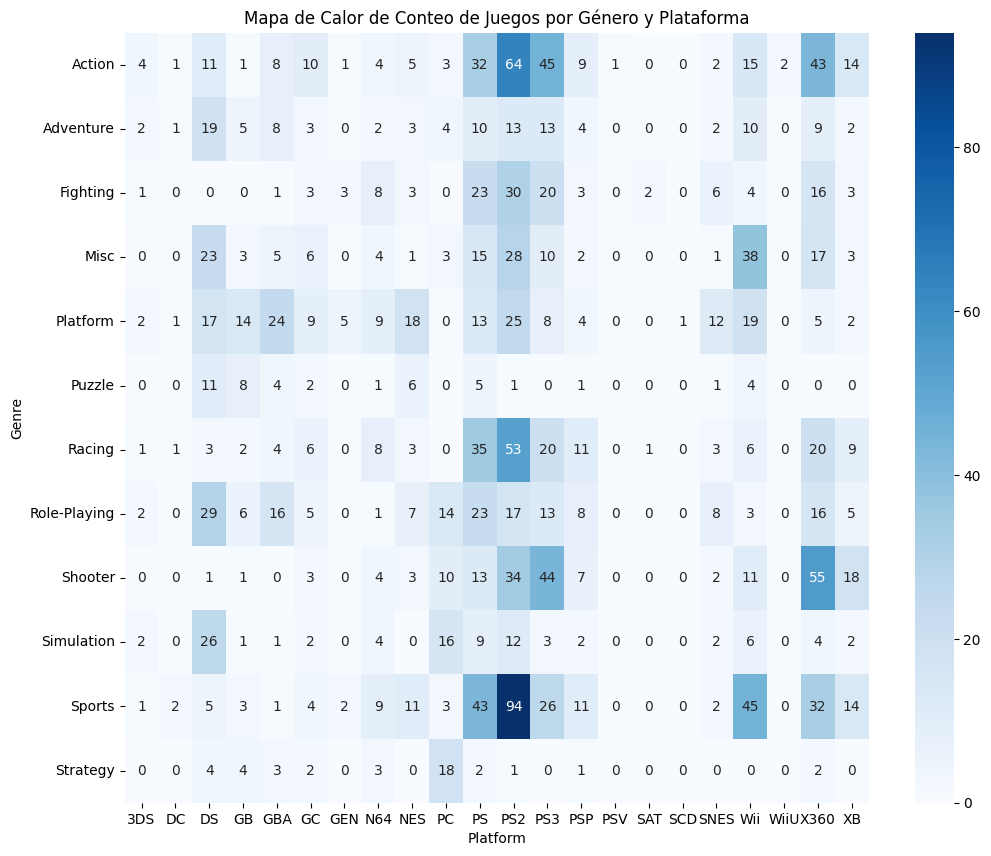

In [86]:
contador_plataforma_genero = df.groupby(['Genre', 'Platform']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 10))
sns.heatmap(contador_plataforma_genero, annot=True, cmap='Blues', fmt='d')

plt.title('Mapa de Calor de Conteo de Juegos por Género y Plataforma')


plt.show()

Observamos que la plataforma Playstation 2 lidera entre los géneros de Deportes, acción y carreras.

## Algunos gráficos de correlación.

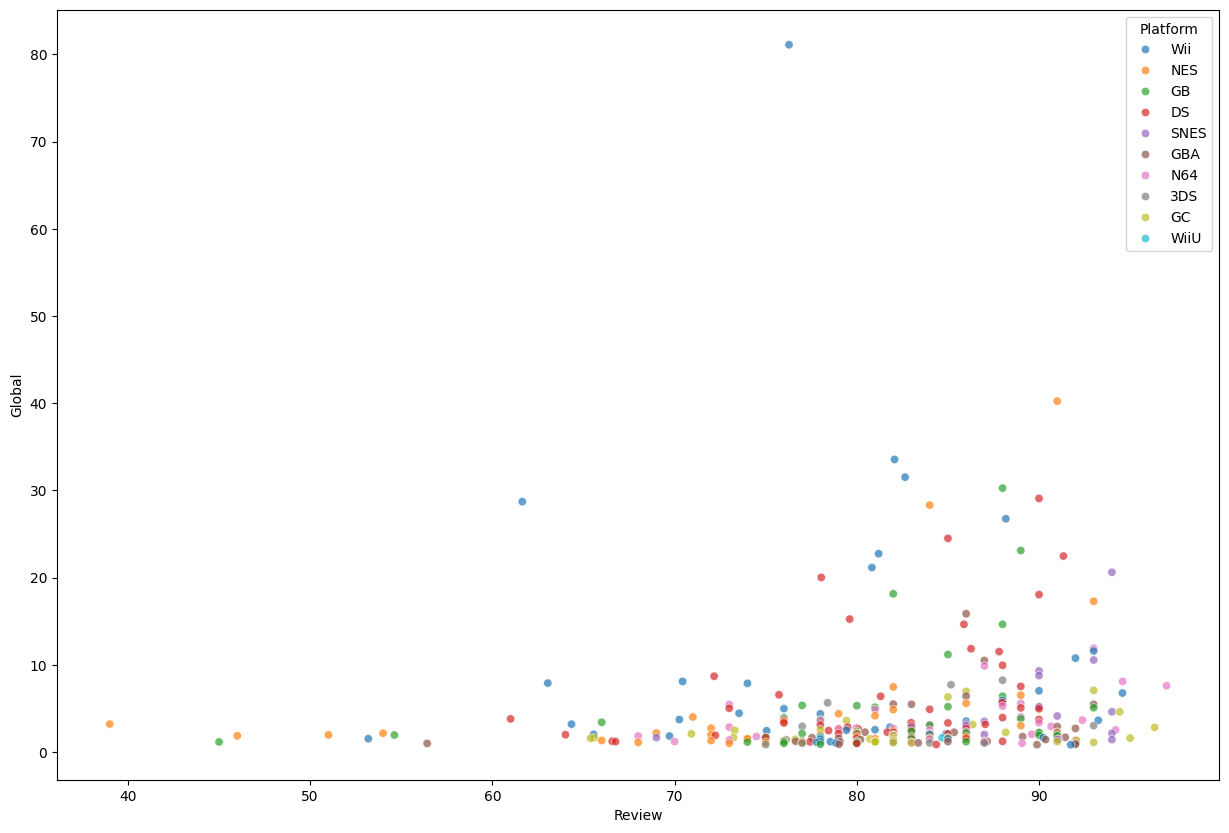

In [5]:
df_nintendo=df[df['Publisher'] =='Nintendo']
plt.figure(figsize=(15, 10))
sns.scatterplot(x="Review",y="Global",data=df_nintendo,hue="Platform", alpha=0.7, edgecolor='w')
plt.show()

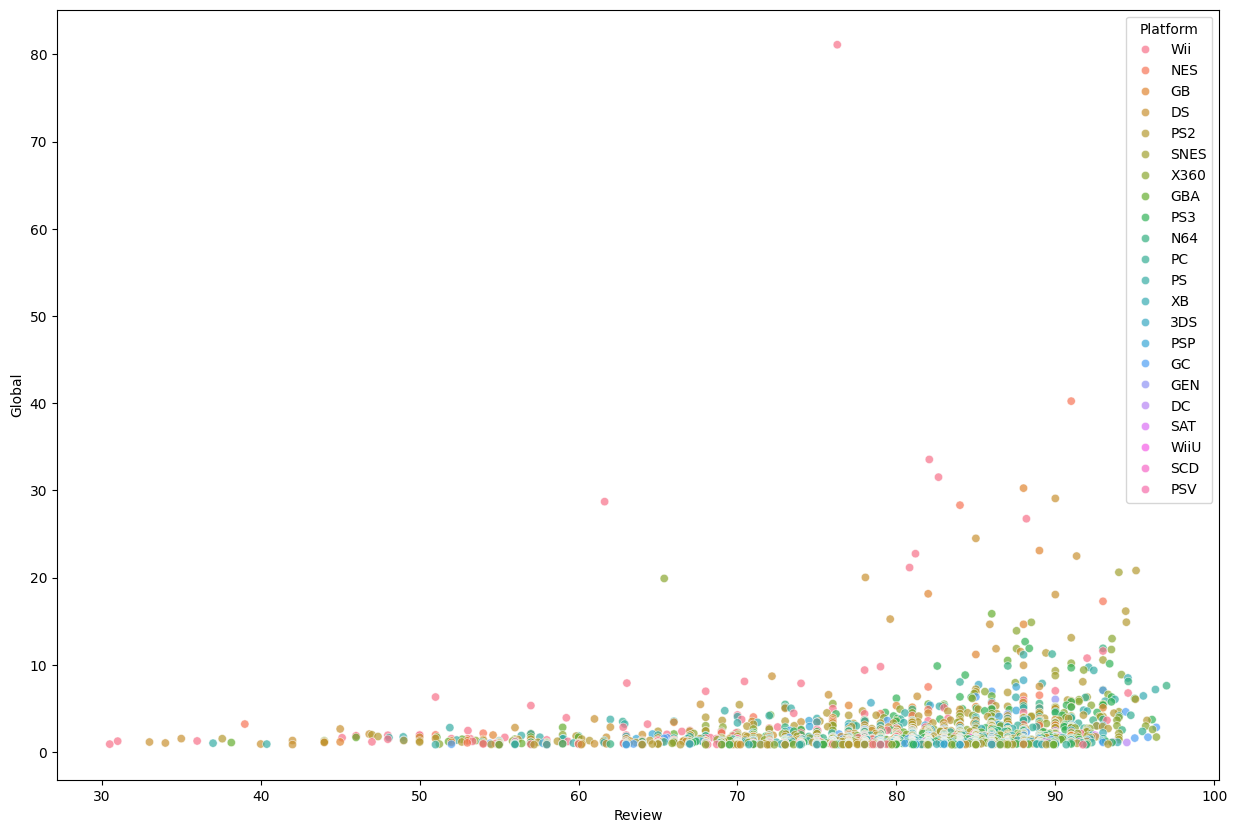

In [6]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="Review",y="Global",data=df,hue="Platform", alpha=0.7, edgecolor='w')
plt.show()

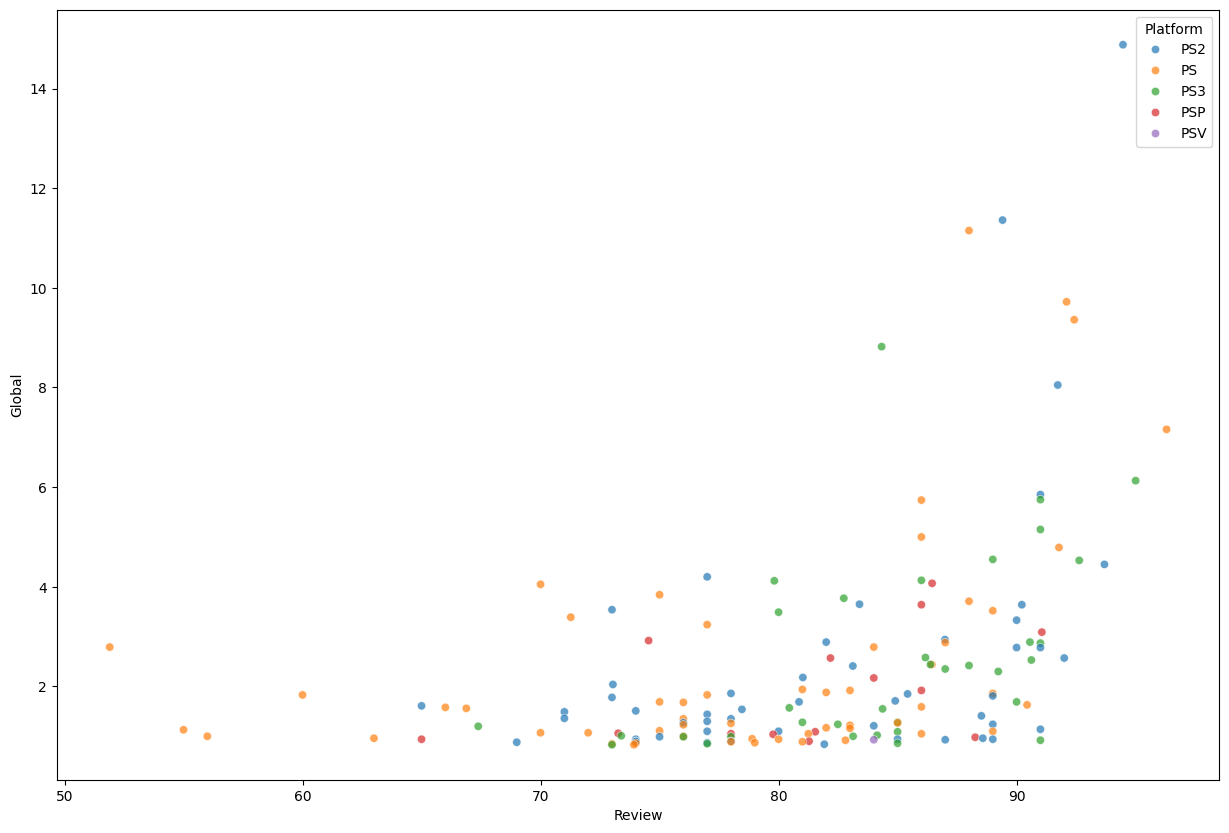

In [7]:
df_sony=df[df['Publisher'] =='Sony Computer Entertainment']
plt.figure(figsize=(15, 10))
sns.scatterplot(x="Review",y="Global",data=df_sony,hue="Platform", alpha=0.7, edgecolor='w')
plt.show()

Se nota una leve correlación entre el Review y ventas globales de Sony.

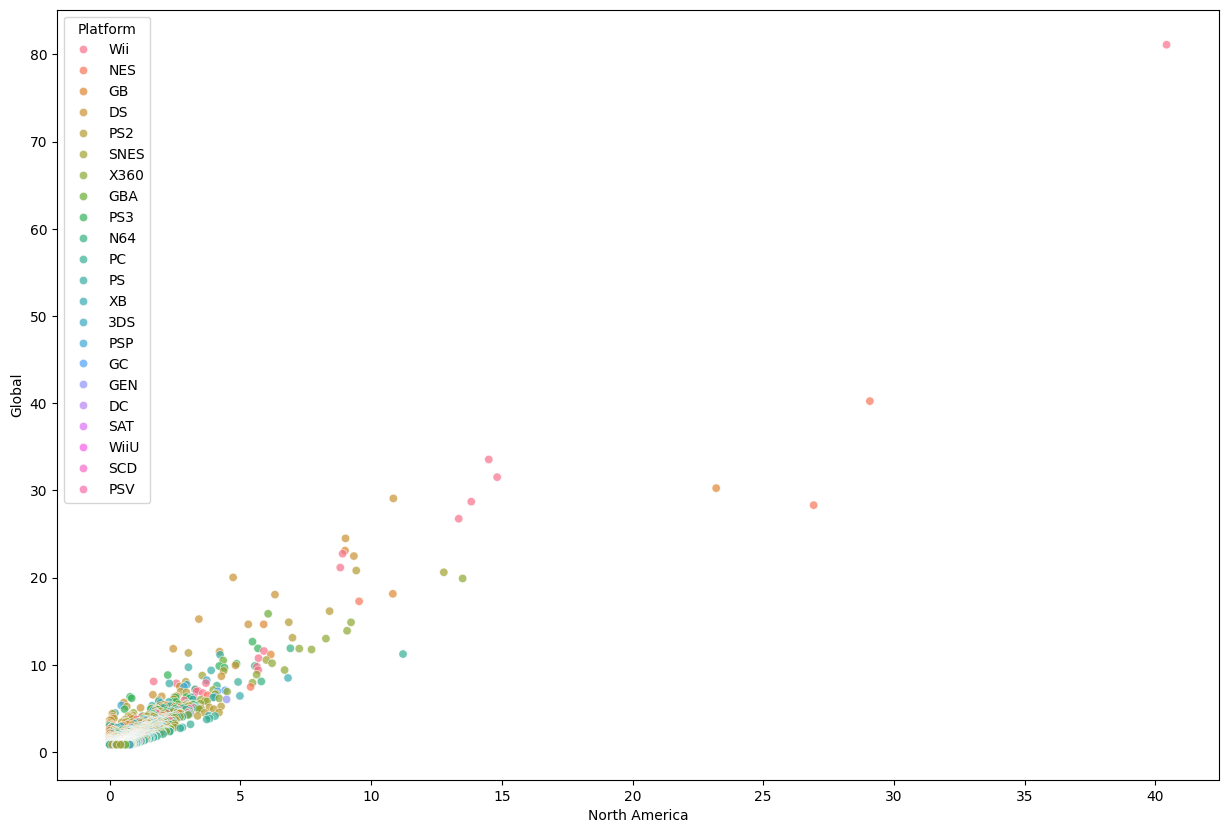

In [107]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="North America",y="Global",data=df,hue="Platform", alpha=0.7, edgecolor='w')
plt.show()

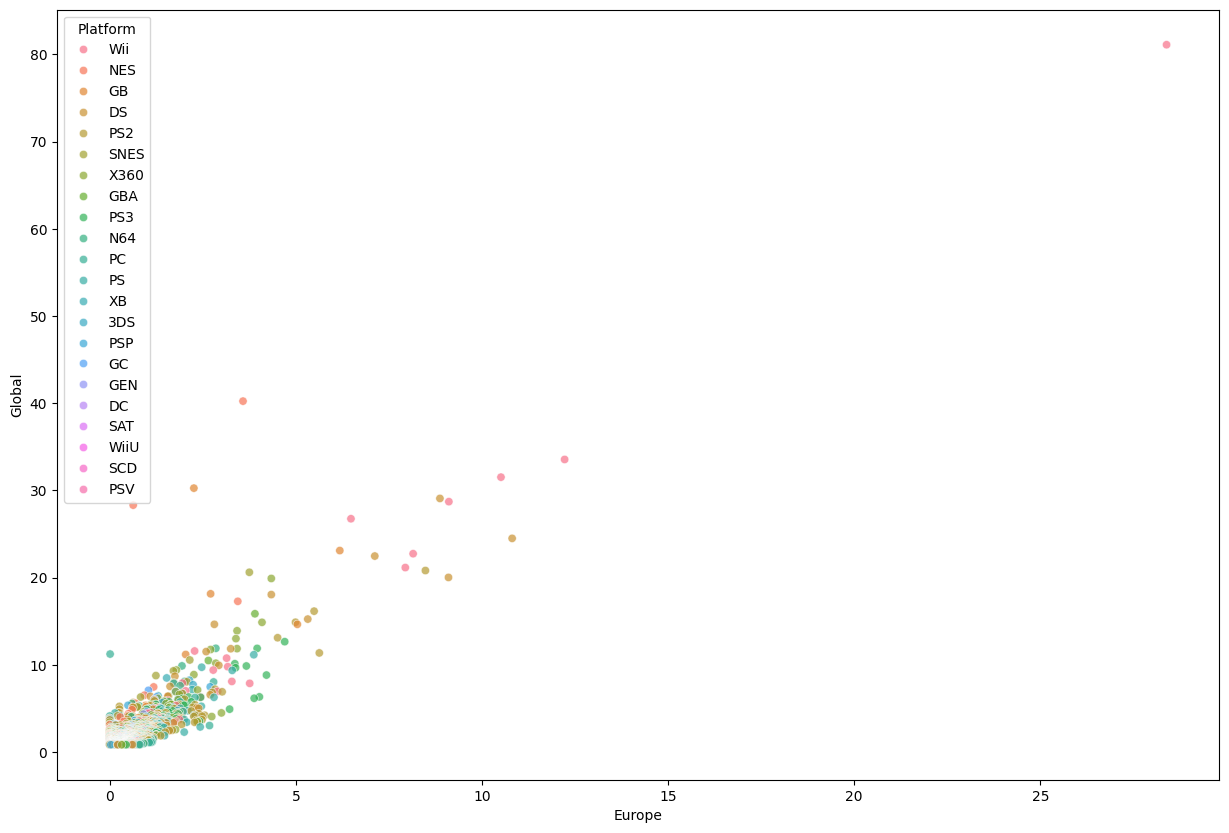

In [8]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="Europe",y="Global",data=df,hue="Platform", alpha=0.7, edgecolor='w')
plt.show()

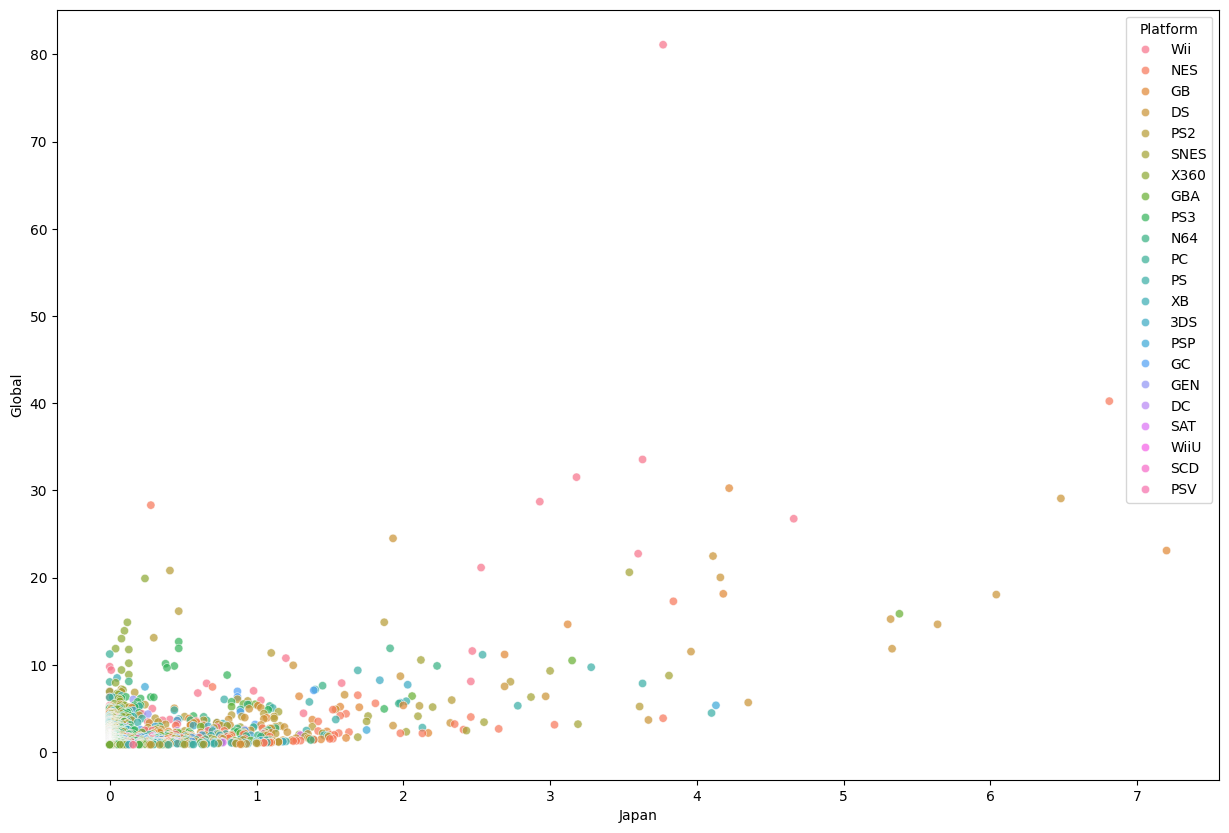

In [9]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="Japan",y="Global",data=df,hue="Platform", alpha=0.7, edgecolor='w')
plt.show()

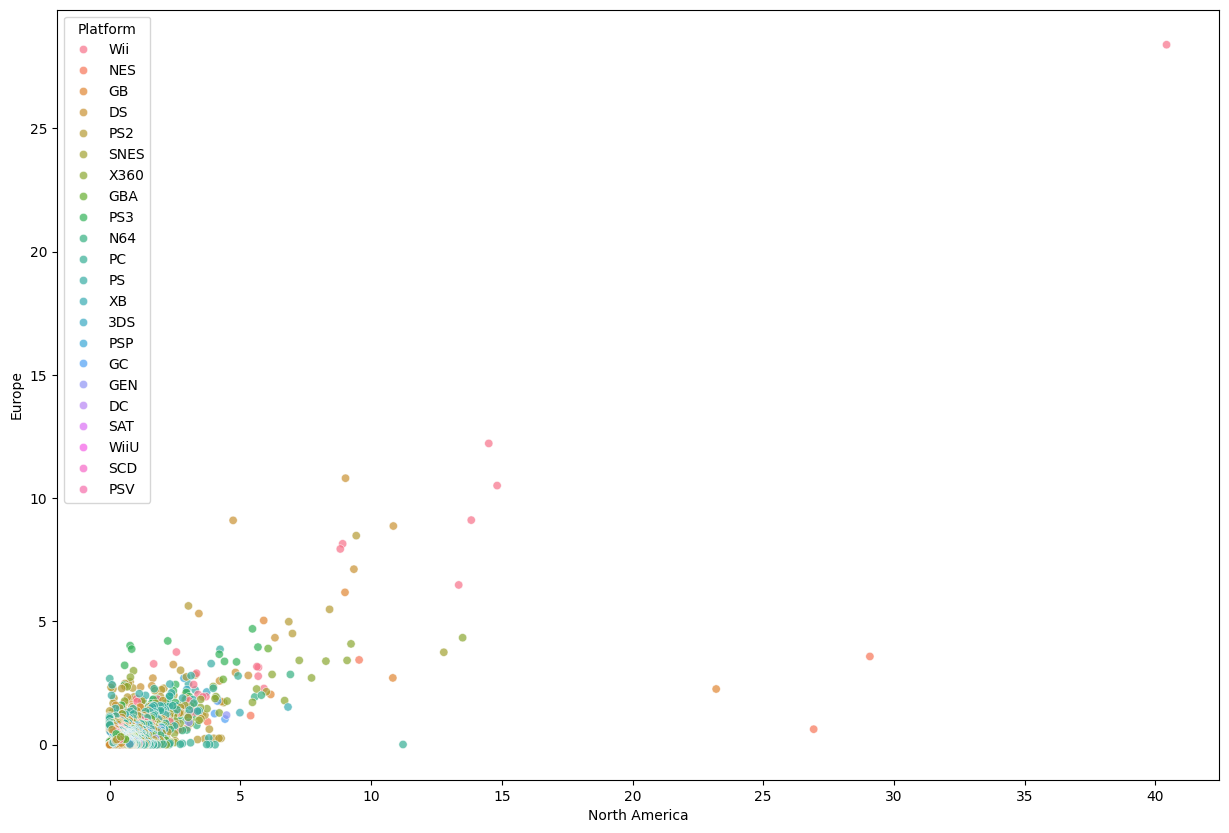

In [10]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x="North America",y="Europe",data=df,hue="Platform", alpha=0.7, edgecolor='w')
plt.show()

El mercado Americano esta correlacionado con el total mundial de Ventas respecto a las consolas.

## Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x117a0c1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x117a30ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1179d6b10>],
 'medians': [<matplotlib.lines.Line2D at 0x117a32550>],
 'fliers': [<matplotlib.lines.Line2D at 0x117a33090>],
 'means': []}

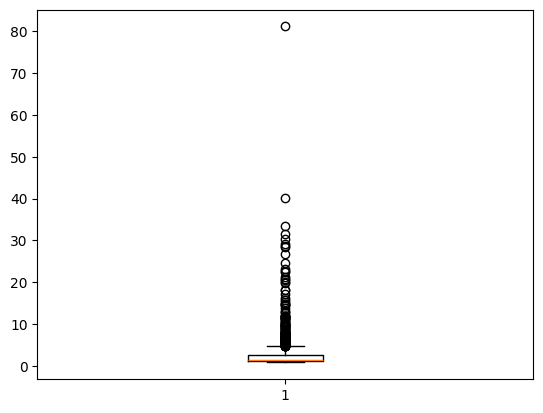

In [11]:
plt.boxplot(df['Global'])


In [23]:
def total_outliers(val):
    val_df = pd.DataFrame(val)  # Convertir la entrada en un DataFrame
    q1 = val_df.quantile(0.25)  # Calcular el cuartil inferior
    q3 = val_df.quantile(0.75)  # Calcular el cuartil superior
    IQR = q3 - q1  # Calcular el rango intercuartílico (IQR)
    cota_inf = q1 - 1.5 * IQR
    cota_sup = q3 + 1.5 * IQR

    # Detectar los outliers en los datos
    outliers = val_df[(val_df < cota_inf) | (val_df > cota_sup)]
    
    # Contar el total de outliers que hay en los datos
    resultado = outliers.count()
    
    return resultado


print(total_outliers(df['Global']))
print(total_outliers(df['North America']))
print(total_outliers(df['Europe']))
print(total_outliers(df['Japan']))
print(total_outliers(df['Rest of World']))


Global    179
dtype: int64
North America    149
dtype: int64
Europe    153
dtype: int64
Japan    264
dtype: int64
Rest of World    169
dtype: int64


# Analisis de Ventas por Región

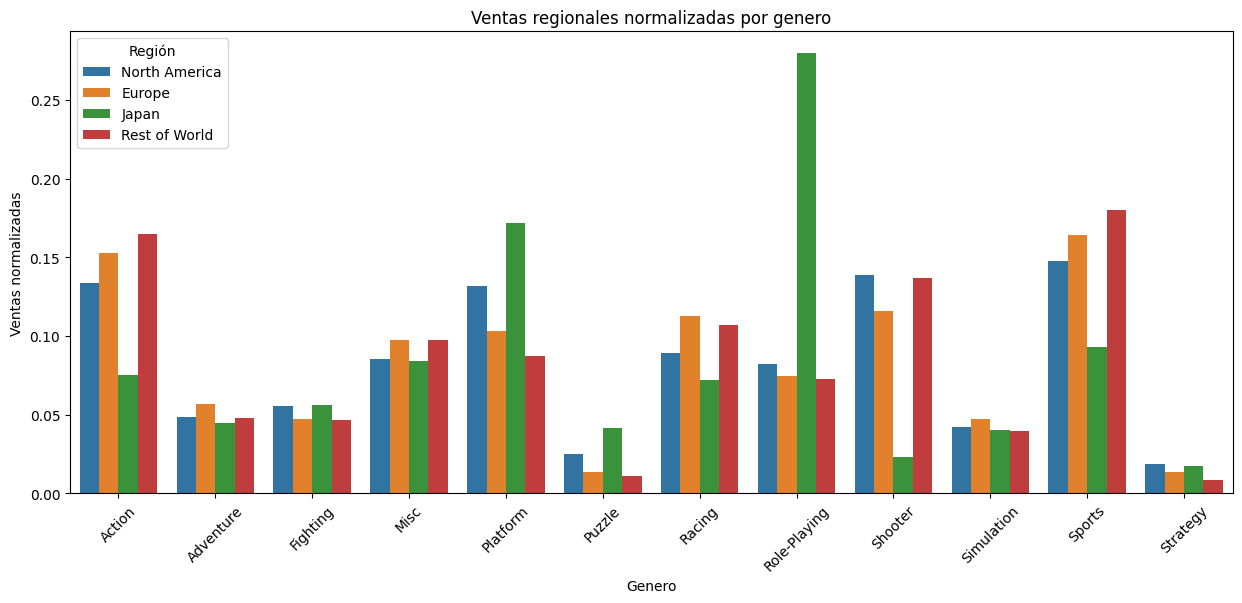

In [4]:
import seaborn as sns
preferencias_regionales_por_genero = df.groupby('Genre').agg({
    'North America': 'sum',
    'Europe': 'sum',
    'Japan': 'sum',
    'Rest of World': 'sum'
})

total_ventas_por_region = preferencias_regionales_por_genero.sum()

preferencia_normalizada_por_genero = preferencias_regionales_por_genero / total_ventas_por_region


#print(preferencias_regionales_por_genero)


data_melted = preferencia_normalizada_por_genero.reset_index().melt(id_vars='Genre', var_name='Region', value_name='Normalized Sales')

#print(data_melted)


plt.figure(figsize=(15, 6))
sns.barplot(x='Genre', y='Normalized Sales', hue='Region', data=data_melted)
plt.title('Ventas regionales normalizadas por genero')
plt.xlabel('Genero')
plt.ylabel('Ventas normalizadas')
plt.xticks(rotation=45)
plt.legend(title='Región', loc='upper left')
plt.show()

## Análisis del gráfico

- Norte America: Los generos principales son acción, plataforma, disparos y deportes.
- Europa: Los generos principales son acción y deportes. Bastante parecido a Norte America.
- Japon: Predominancia amplia en juegos de rol. Le sigue juegos de plataforma.
- Resto del mundo: Acción, deportes y disparos son lo preferidos.

### Sugerencias:
- En el mercado Japones es claro que los juegos de rol tienen mucha aceptación. Seguir invertiendo en esta categoria a futuro y observar las distintas ramas de este tipo de juego para abarcar mucho más publico.
- Para el mercado de Norte America que es el más influyente, seguir invertiendo en en los generos clave acción, plataforma, disparos y deportes.
